## Aluno: Marcelo Ortiz de Santana

### usando o arquivo house_prices.csv, responda as questões abaixo

## 1) leia o arquivo, trate os valores faltantes e remova duplicatas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [34]:
# resposta 1
df = pd.read_csv('house_prices.csv', sep=';')
print('### Antes tratamento ###') 
print('Dados faltantes:')
print(df.isnull().sum())

print('Dados duplicados:')
print(df.duplicated().sum())

[df[column].fillna(df[column].mean(), inplace=True) for column in df.columns] 
df.drop_duplicates(inplace = True) 

print('\n### Depois tratamento ###') 
print('Dados faltantes:')
print(df.isnull().sum())

print('Dados duplicados:')
print(df.duplicated().sum())

### Antes tratamento ###
Dados faltantes:
tamanho      1
n_quartos    1
idade        2
preco        0
dtype: int64
Dados duplicados:
1

### Depois tratamento ###
Dados faltantes:
tamanho      0
n_quartos    0
idade        0
preco        0
dtype: int64
Dados duplicados:
0


## 2) Há outliers no data set? Se sim, trate-os de forma adequada

(49, 4)

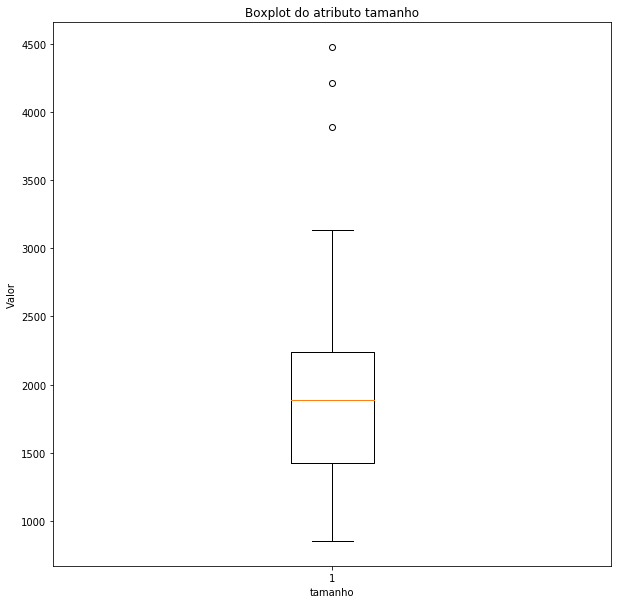

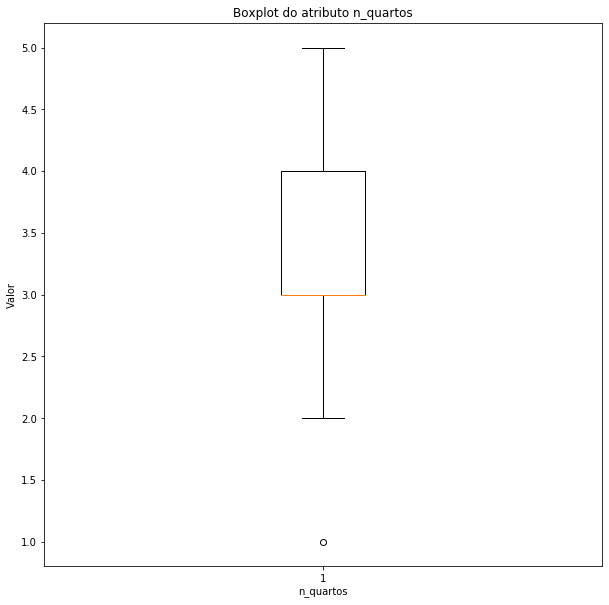

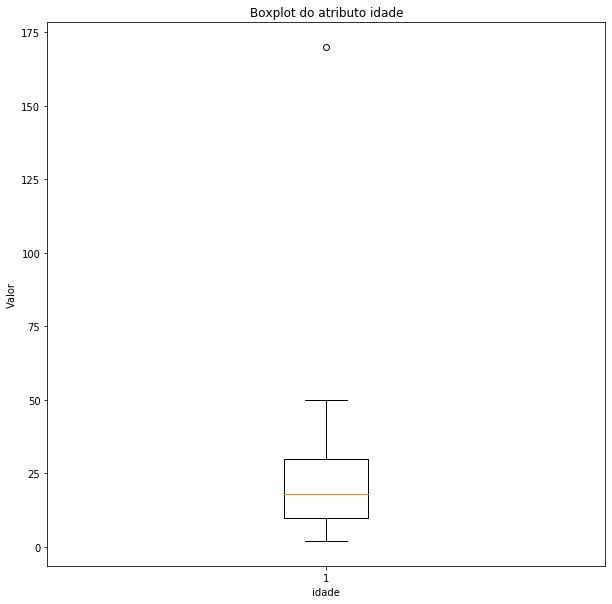

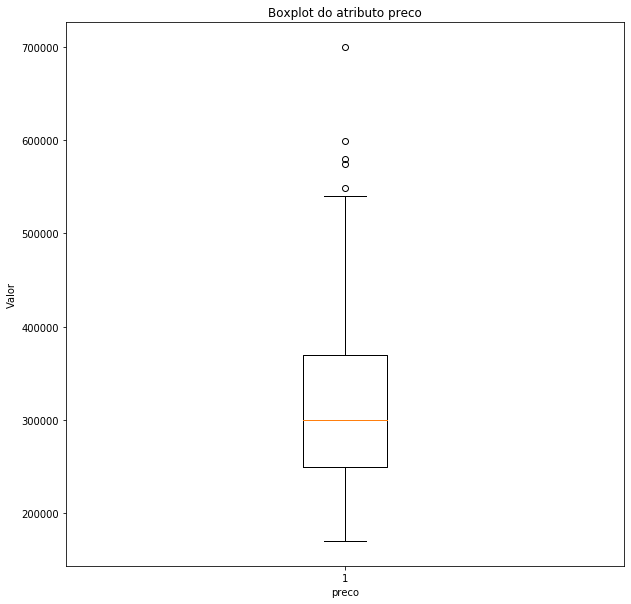

In [3]:
# resposta 2
def plot_boxplot(df, column):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Valor')
    ax.set_title(f'Boxplot do atributo {column}')
    ax.boxplot(df[column])
columns = df.columns 

[plot_boxplot(df, column) for column in columns]
df.shape

In [4]:
print("Há algumas casas com tamanhos, e uma com idade discrepantes. Talvez seja o caso de separarmos essas em outra base de treino e teste. Nesse caso, irei remover")

colunas_numericas = [coluna for coluna in df.columns if not coluna == 'preco']
# colunas_numericas
def remover_outliers(df, colunas_numericas):
    for coluna in colunas_numericas:
        mean_coluna, std_coluna = df[coluna].mean(), df[coluna].std()
        outlier_limit = std_coluna * 3
        df = df[(df[coluna] >= (mean_coluna - outlier_limit)) & (df[coluna] <= (mean_coluna + outlier_limit))]
    return df
df = remover_outliers(df, colunas_numericas)

Há algumas casas com tamanhos, e uma com idade discrepantes. Talvez seja o caso de separarmos essas em outra base de treino e teste. Nesse caso, irei remover


## 3) insira uma coluna, denominada 'n_andares', com valores no intervalo [1,2], preenchidos de forma aleatória

In [19]:
# resposta 3
# [inicio, fim) // Utiliza intervalo fechado no valor inicial, e aberto no final
# np.random.randint(1, 2, 10)
df['n_andares'] = np.random.randint(1, 3, df.shape[0])
df.head()

,tamanho,n_quartos,idade,preco,n_andares
0,2104.0,3.0,45.0,399900,2
2,1600.0,3.0,30.0,329900,2
3,2400.0,3.0,32.0,369000,1
4,1416.0,2.0,10.0,232000,1
5,3000.0,4.0,14.0,539900,1


## 4) para cada variável, plote um scatter e verifique sua relação com a variável meta (preco)

Correlações:

tamanho 0.8158175002429346
n_quartos 0.3521216448094174
idade -0.04624062772478257
n_andares 0.04170419021022864

Há uma forte relação linear entre a variável tamanho


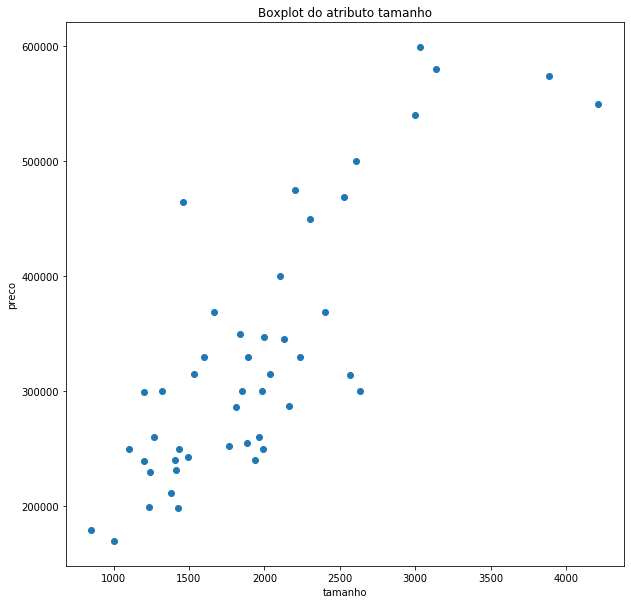

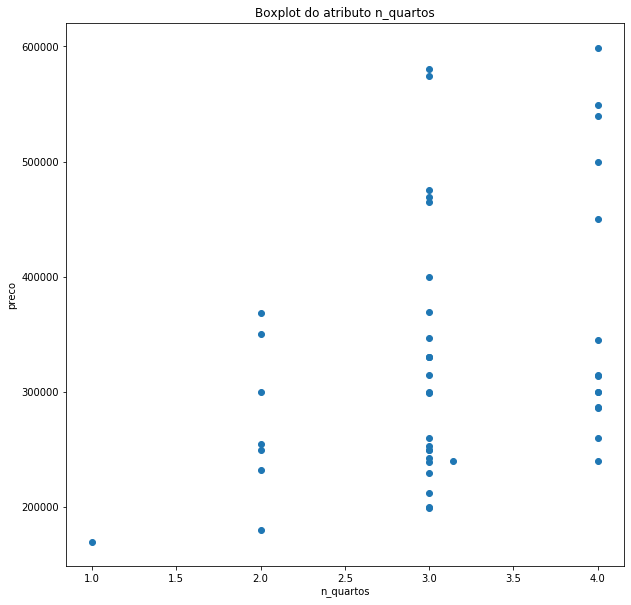

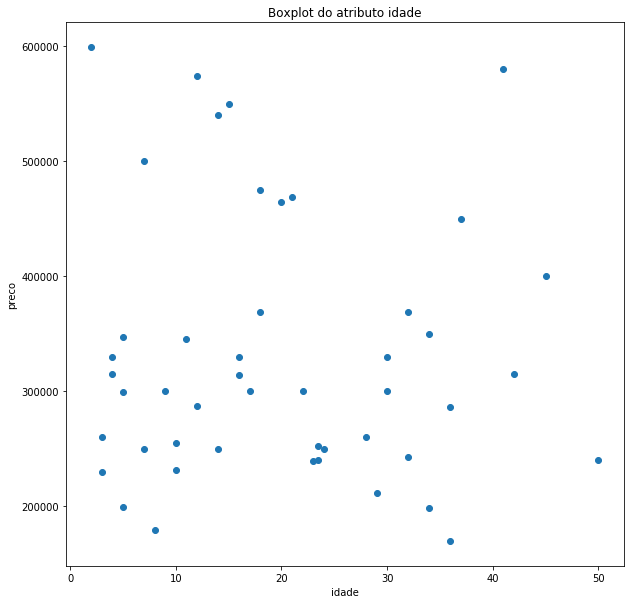

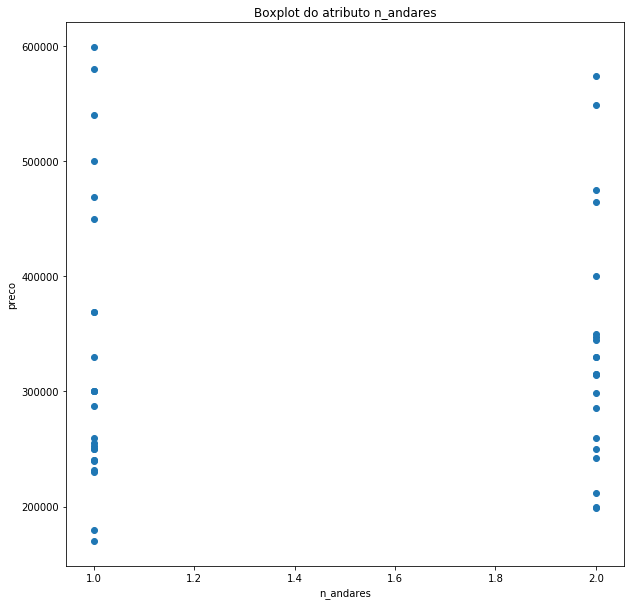

In [22]:
# resposta 4
meta = 'preco'
def plot_scatter(df, attribute, meta):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_xlabel(f'{attribute}')
    ax.set_ylabel(f'{meta}')
    ax.set_title(f'Scatter do atributo {attribute}')
    ax.scatter(df[attribute], df[meta])
columns_sem_meta = [column for column in df.columns if not column == meta]
columns_sem_meta
[plot_scatter(df, column, meta) for column in columns_sem_meta]
print('Correlações:\n')
[print(column, df[column].corr(df[meta])) for column in columns_sem_meta]
print('\nHá uma forte relação linear entre a variável tamanho')

## 5) Separe o dataset em conjuntos de treino e teste, na proporção 70/30

In [2]:
# resposta 5
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.3)
print('Train', train.shape[0] / (train.shape[0] + test.shape[0]))
print('Test', test.shape[0] / (train.shape[0] + test.shape[0]))

NameError: name 'df' is not defined

## 6) Utilizando a Scikit Learn, ajuste uma regressão linear aos dados e mostre o MSE da etapa de treinamento

In [26]:
# resposta 6
from sklearn.linear_model import LinearRegression
from sklearn import metrics
X = train[columns_sem_meta]
y = train[meta]
reg = LinearRegression().fit(X, y)
y_predict = reg.predict(X)
mse_treino_manual = np.mean((y_predict - y)**2) 
print('MSE Treino Manual', mse_treino_manual)
mse_treino_skit = metrics.mean_squared_error(y, y_predict)
print('MSE Manual', mse_treino_skit)

MSE Treino Manual 3574266607.847229
MSE Manual 3574266607.847229


## 7) Prediga o valor da variável meta para cada amostra do conjunto de teste. Qual o MSE? 

In [33]:
# resposta 7
X = test[columns_sem_meta]
y = test[meta]
y_predict = reg.predict(X)
mse = metrics.mean_squared_error(y, y_predict)
print('MSE', mse)
r2 = metrics.r2_score(y, y_predict)
print('R2', r2, 'Essas variáveis não estão explicando muito' if r2 < .5 else '') 

MSE 5766202066.219964
R2 0.4977228856139514 Essas variáveis não estão explicando muito
